[132.3596696    9.77182532]


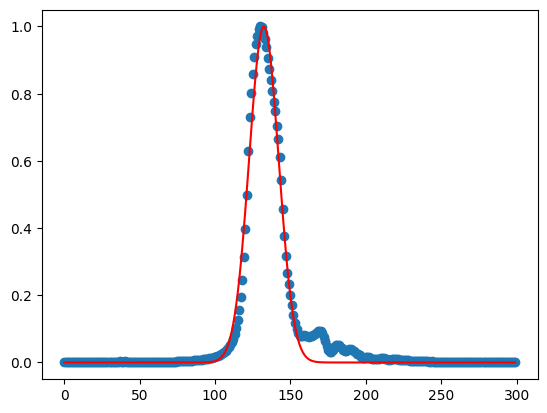

In [109]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

def gauss_fit(x,mu,sigma):
    y = (np.exp((-1*(x-mu)**2)/(2*sigma**2)))
    return y



filename = 'test_0000.csv'
df = pd.read_csv(filename)
row_sums = df.sum(axis=1).tolist()
column_sums = df.sum(axis=0).tolist()

row_sum_norm = row_sums[800:1100]
row_sum_partial = (row_sum_norm-np.min(row_sum_norm))
row_sum_partial = row_sum_partial/np.max(row_sum_partial)
x = np.arange(len(row_sum_partial))
#y = gauss_fit(x,1,1,0.2,0)

import matplotlib.pyplot as plt



popt, pcov = curve_fit(gauss_fit, x, row_sum_partial,p0=[150,20],maxfev=100000)
y_fit = gauss_fit(x,popt[0],popt[1])
y_fit_norm = y_fit/np.max(y_fit)
fig = plt.figure()
plt.scatter(x,row_sum_partial)
plt.plot(x, y_fit_norm,'r-')

print(popt)


[131.5749233   11.75655069]


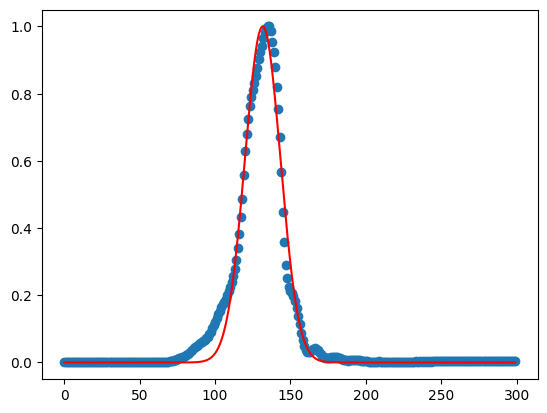

In [110]:

column_sum_norm = column_sums[500:800]
column_sum_partial = (column_sum_norm-np.min(column_sum_norm))
column_sum_partial = column_sum_partial/np.max(column_sum_partial)
x = np.arange(len(column_sum_partial))
#y = gauss_fit(x,1,1,0.2,0)

import matplotlib.pyplot as plt



popt, pcov = curve_fit(gauss_fit, x, column_sum_partial,p0=[125,20],maxfev=100000)
y_fit = gauss_fit(x,popt[0],popt[1])
y_fit_norm = y_fit/np.max(y_fit)
fig = plt.figure()
plt.scatter(x,column_sum_partial)
plt.plot(x, y_fit_norm,'r-')

print(popt)
